<a href="https://colab.research.google.com/github/r-autowired/AIMLWorks/blob/main/Notes/Adv.ML_Models/Pi3_Adv_Modl_EasyVisa_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [90]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [91]:
# Installing all required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline as imbPipeline
from sklearn import metrics

## Import Dataset

In [92]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
easy_visa = pd.read_csv("/content/drive/MyDrive/AIML_UT/Colab_Files/Pi3_AdvML/Pi3_Proj/EasyVisa.csv")
df = easy_visa.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [94]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [95]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [96]:
df.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


#### Observation:
- No row has NA or null value

#### Understand the shape of the dataset

In [97]:
df.shape

(25480, 12)

#### Observation:
- Total of 12 columns and 25480 records of cases for visa data

#### Check the data types of the columns for the dataset

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observation:
- 9 column of type object and 2 column type int and 1 float column

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Observation:
- Mostly statistical summary is for numberic columns
- From above
 - Mean or Avg. no. of employees is at 5667 and min is -26 and max is 602069
   - there is a negative number of employees which is not possible and needs an imputation
 - Avg. year for establishment is 1979 and there are companies that are 2 centuries older are getting visa
 - 75% of the companies are established before 2005
 - Avg. prevailing wage is around 74K which is pretty decent salary for avg. amaerican
   - Min wage is $2  which is not possible and may be it can be hourly but even if its hourly this does not comply with minimum wage criteria in USA and we have standarisation in the salary calculation to have converted all salaries to yearly that will be the normalization

#### Fixing the negative values in number of employees columns

In [100]:
# Replacing the negative values in 'no_of_employees' column with the median value
df['no_of_employees'] = df['no_of_employees'].apply(lambda x : np.nan if x < 0 else x)
df['no_of_employees'] = df['no_of_employees'].fillna(df['no_of_employees'].median())
df['no_of_employees'].head()

,no_of_employees
0,14513.0
1,2412.0
2,44444.0
3,98.0
4,1082.0


#### Observation:
- Here the negative number of employess is imputed with median value
- There could various ways but after going through the data there are companies from 1980s and so and so thought process is for choosing median value

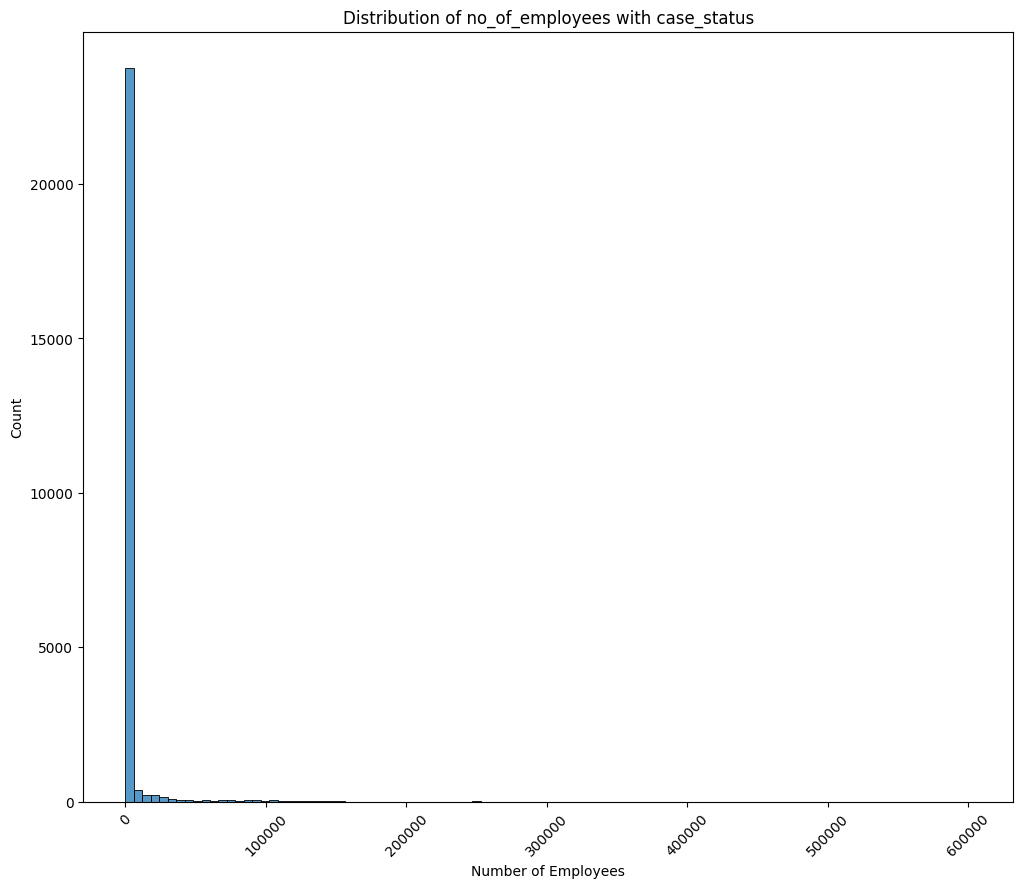

In [101]:
plt.figure(figsize=(12, 10))
#sns.countplot(x='no_of_employees', hue='case_status', data=df, bins=10)
#sns.histplot(x='no_of_employees', hue='case_status', data=df, bins=10)
sns.histplot(x='no_of_employees', data=df, bins=100)
plt.title('Distribution of no_of_employees with case_status')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


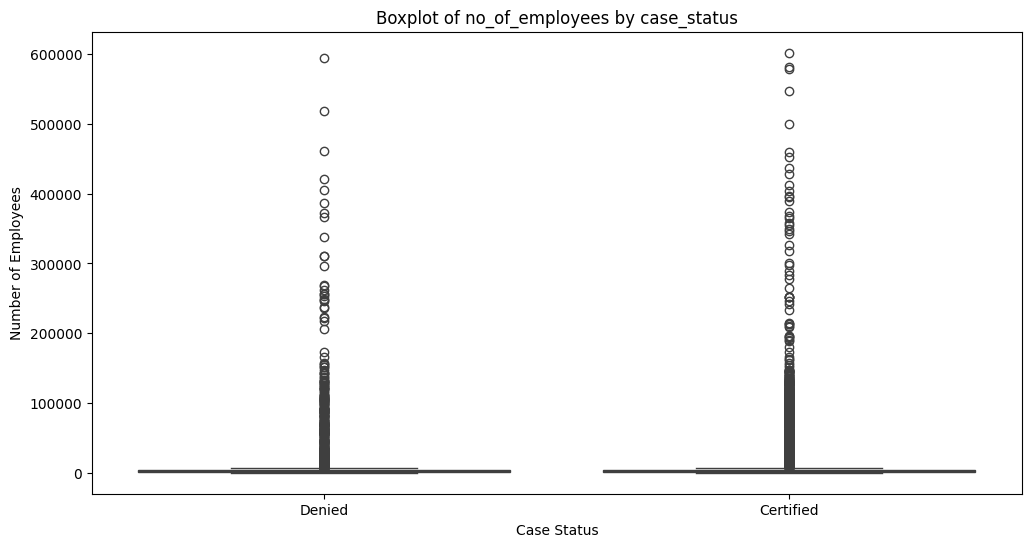

In [102]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='case_status', y='no_of_employees', data=df)
plt.title('Boxplot of no_of_employees by case_status')
plt.xlabel('Case Status')
plt.ylabel('Number of Employees')
plt.show()


#### Observation:
- Above plots are just visualization of number of employees Vs. case status after imputation

#### Let's check the count of each unique category in each of the categorical variables

In [103]:
categorical_cols = df.select_dtypes(include='object')
print(categorical_cols.columns)

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [104]:
for col in categorical_cols:
  print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for case_id:
case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64

Value counts for continent:
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

Value counts for education_of_employee:
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

Value counts for has_job_experience:
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

Value counts for requires_job_training:
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

Value counts for region_of_employment:
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtyp

#### Observation:
- Asia has the most number of applications for visa
- Most of the wages are yearly and other categories of wages will have to be convereted to yealy wage so as to have normalization
- Most of the applicants of visa are full timer
- Nealy 70% of the applicants of visa are certified
- Most of the opportunity are in NE, S, W regions and then MW and Island
- Most of the applicants does not require job training and that means mostly are qualified for the position
- Majority of the applicants have Bachelors and next comes Masters
 - There are high schools and doctorates
 - This could be for other visa categories for labours and highly skilled professors or research positions

### Univariate Analysis

In [105]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [106]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

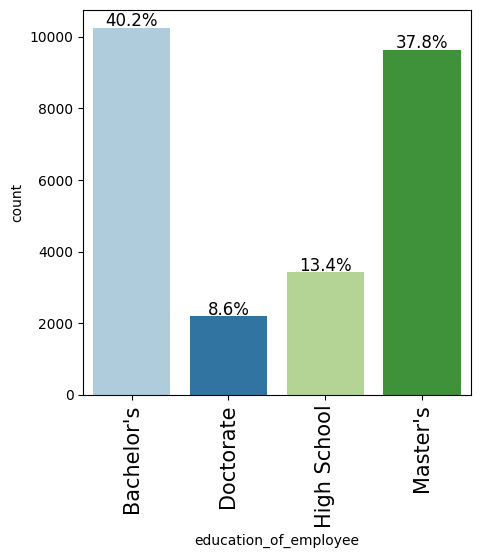

In [107]:
labeled_barplot(df, "education_of_employee", True)

#### Observation:
- Most of the applicants are either Bachelors or Masters
- 40% have Bachelor degree
- Only 8.6% have doctorate
- 13.4% are high schoolers but this visa category can be for labour category

#### Observations on region of employment

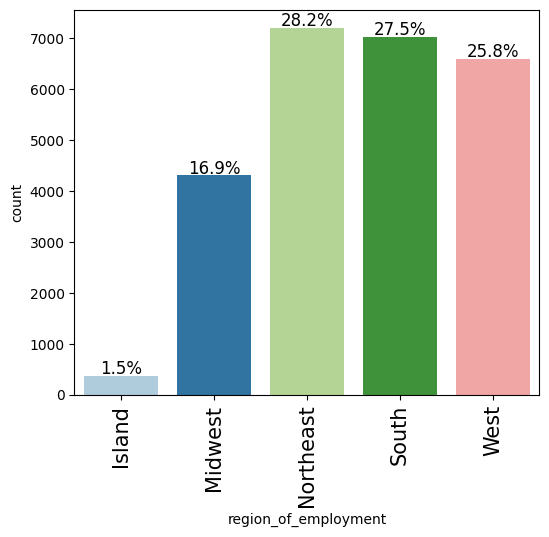

In [108]:
labeled_barplot(df, "region_of_employment", True)

#### Observation:
- Island has the least number of opportunities posted or placed
- NE region has highest number of placements and next is S and then W

#### Observations on job experience

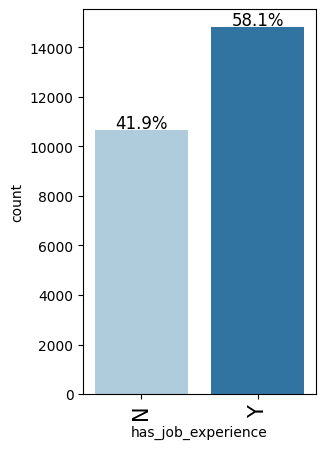

In [109]:
labeled_barplot(df, "has_job_experience", True)

#### Observation:
- 58% has job experience - this could be people working at offshore and are requried to be at onsite for the position or could be trained on job
- Remaning 41.9% has no job expereience applying for visa could be mostly students with masters
- These are my assumptions :)

#### Observations on case status

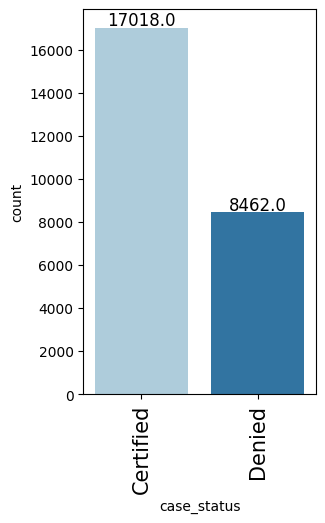

In [110]:
labeled_barplot(df, "case_status")

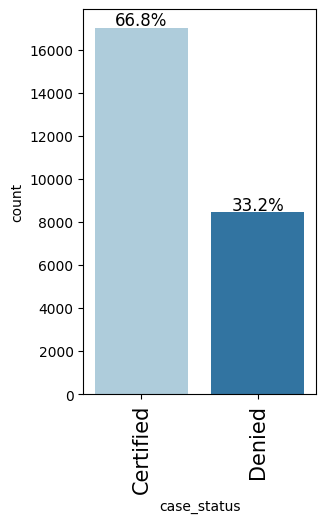

In [111]:
labeled_barplot(df, "case_status", True)

#### Observation:
- 66.8% of applicants are Certified Visa
- When training the model this could be an imbalanced data for the split

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [112]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [113]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    tab1["Percentage"] = (tab1["Certified"] / tab1['All']) * 100
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    for p in ax.patches:
      label = "{:.2f}%".format(p.get_height()*100)  # count of each level of the category

      x = p.get_x() + p.get_width() / 2  # width of the plot
      y = p.get_height()  # height of the plot

      ax.annotate(
          label,
          (x, y),
          ha="center",
          va="center",
          size=12,
          xytext=(0, 5),
          textcoords="offset points",
      )  # annotate the percentage
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All  Percentage
education_of_employee                                      
All                        17018    8462  25480   66.789639
Bachelor's                  6367    3867  10234   62.214188
High School                 1164    2256   3420   34.035088
Master's                    7575    2059   9634   78.627777
Doctorate                   1912     280   2192   87.226277
------------------------------------------------------------------------------------------------------------------------


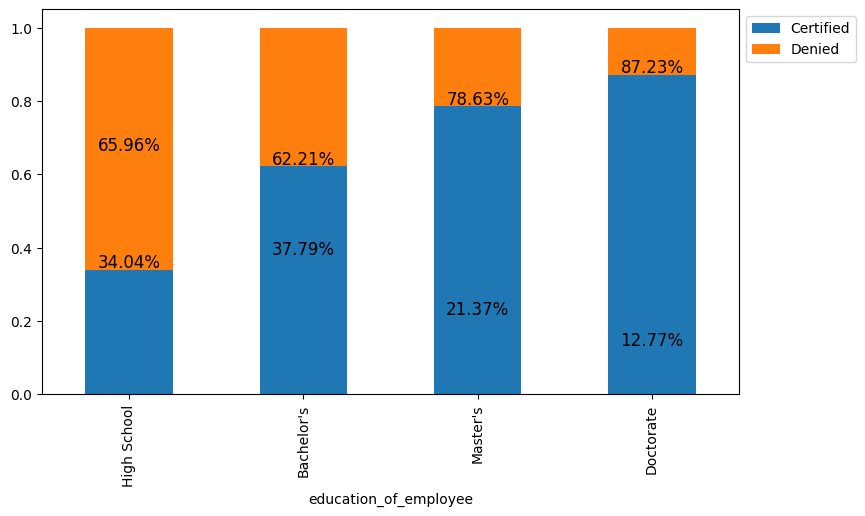

In [114]:
stacked_barplot(df, "education_of_employee", "case_status")

#### Observation:
- Applicants with Doctorate has less number of case denials
- High schoolers are the most cases denied
- Higher the education higher the chance of visa certified
- Yes there is a correlation with education and visa approval

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All  Percentage
continent                                          
All                17018    8462  25480   66.789639
Asia               11012    5849  16861   65.310480
North America       2037    1255   3292   61.877278
Europe              2957     775   3732   79.233655
South America        493     359    852   57.863850
Africa               397     154    551   72.050817
Oceania              122      70    192   63.541667
------------------------------------------------------------------------------------------------------------------------


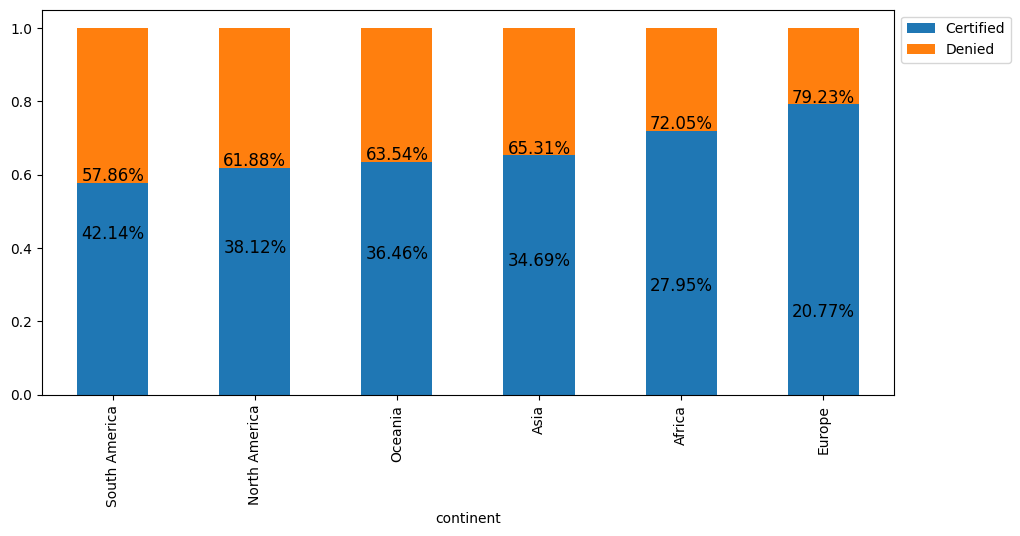

In [115]:
stacked_barplot(df, "continent", "case_status")

In [155]:
df.groupby([df['continent']=='Europe']).agg({'case_status':['count']}).reset_index()
## == validation makes the condition BOOLEAN and below table is only for IS Europe ?

,continent,case_status
,,count
0,False,21748
1,True,3732


#### Observation:
- Europe has the least number of visa denials - 20%
- S.America has the most visa denials - 42%
- Africa stands second is most number of visa approvals - at 72%

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All  Percentage
has_job_experience                                      
All                     17018    8462  25480   66.789639
N                        5994    4684  10678   56.134108
Y                       11024    3778  14802   74.476422
------------------------------------------------------------------------------------------------------------------------


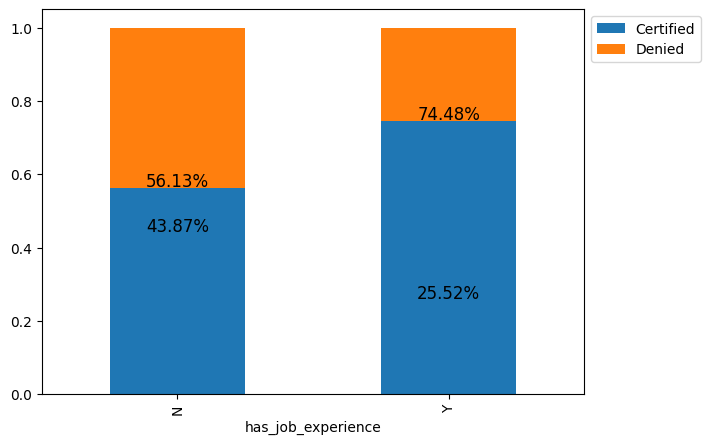

In [116]:
stacked_barplot(df, "has_job_experience", "case_status")

#### Observation:
- There is higher chance that applicants with job experience has more approval rating of visa - nearly 75% people are approved of visa
- Compared to people with no experience who got most visa denial of 56%

#### Checking if the prevailing wage is similar across all the regions of the US

In [117]:
def yearly_wage(row):
    if row['unit_of_wage'] == 'Year':
        return row['prevailing_wage']
    elif row['unit_of_wage'] == 'Month':
        return row['prevailing_wage'] * 12
    elif row['unit_of_wage'] == 'Bi-Weekly':
        return row['prevailing_wage'] * 26
    elif row['unit_of_wage'] == 'Week':
        return row['prevailing_wage'] * 52
    elif row['unit_of_wage'] == 'Hour':
        return row['prevailing_wage'] * 2080 # Assuming 40 hours/week and 52 weeks/year
    else:
        return np.nan


# Apply the conversion to create a new column with yearly wages
df['yearly_wage'] = df.apply(yearly_wage, axis=1)
df['yearly_wage_1000s'] = df['yearly_wage'] // 1000
#
print(df[['case_id', 'prevailing_wage', 'unit_of_wage', 'yearly_wage', 'yearly_wage_1000s']].head())


  case_id  prevailing_wage unit_of_wage  yearly_wage  yearly_wage_1000s
0  EZYV01         592.2029         Hour  1231782.032             1231.0
1  EZYV02       83425.6500         Year    83425.650               83.0
2  EZYV03      122996.8600         Year   122996.860              122.0
3  EZYV04       83434.0300         Year    83434.030               83.0
4  EZYV05      149907.3900         Year   149907.390              149.0


#### Observation:
- Converting wages to yealy for normalization
- also have wages is 1000s for plotting

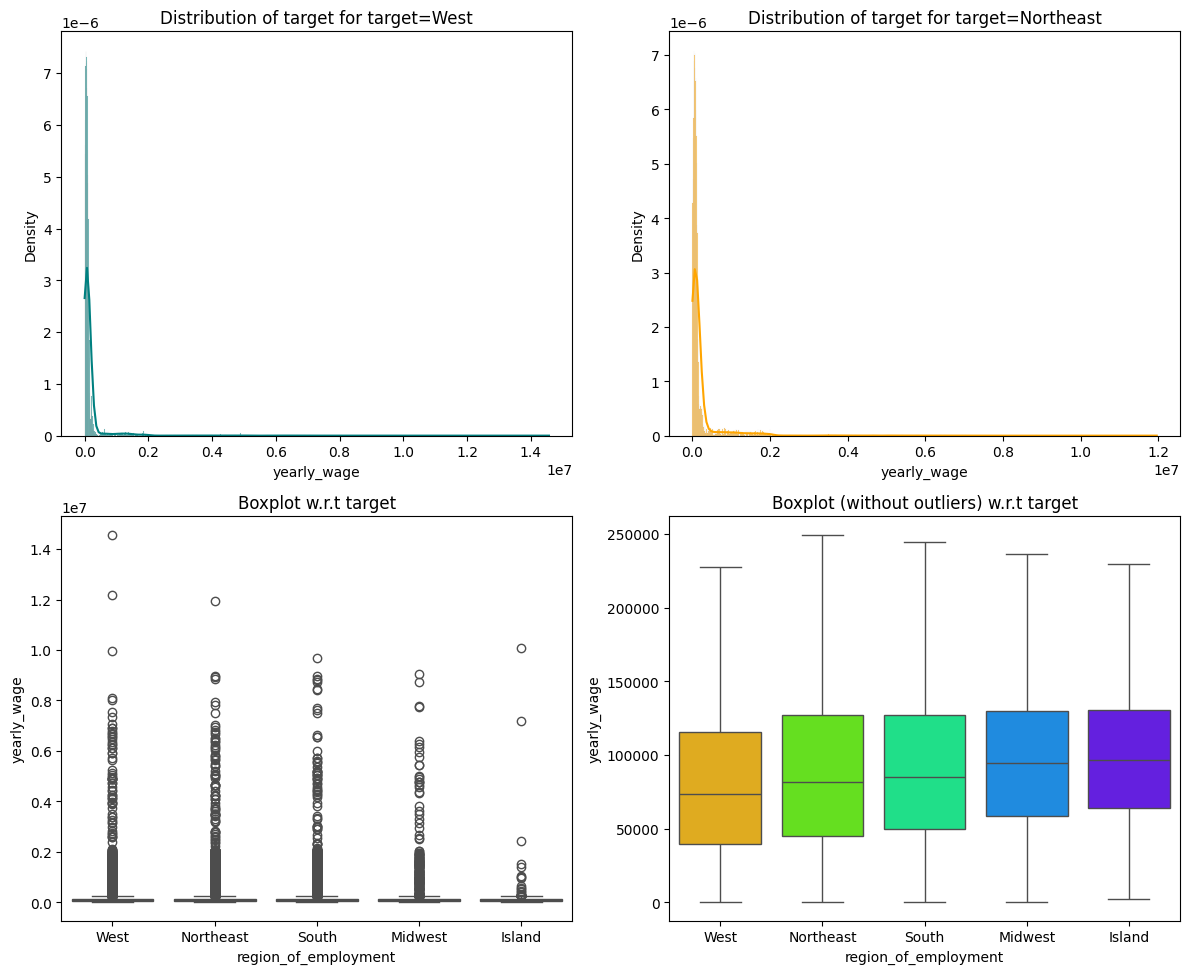

In [118]:
distribution_plot_wrt_target(df, "yearly_wage", "region_of_employment")

#### Observation:
- Island and Midwest has the high median salary (wihtout outliers)
- West has the least median salary but it has outlier as shown above for the highest salary of 14 mil

In [119]:
top_salaries = df.sort_values(by=['yearly_wage'], ascending=False).head()
print(top_salaries[['case_id', 'yearly_wage']])

         case_id  yearly_wage
11631  EZYV11632  14569149.40
7015    EZYV7016  12189130.72
942      EZYV943  11957436.40
13818  EZYV13819  10074525.76
5985    EZYV5986   9959159.60


#### Observation:
- 14mil is the higest paid salary

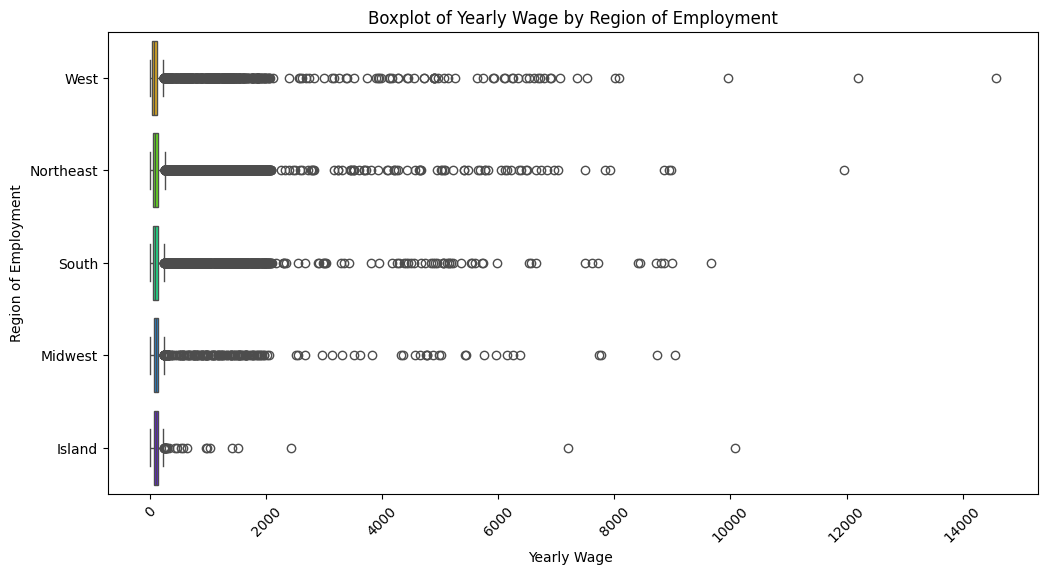

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='yearly_wage_1000s', y='region_of_employment', data=df, showfliers=True, palette="gist_rainbow")
plt.title('Boxplot of Yearly Wage by Region of Employment')
plt.ylabel('Region of Employment')
plt.xlabel('Yearly Wage ')
plt.xticks(rotation=45)
plt.show()

#### Observation:
- Box plot to show case outliers vs median salary range
- Even after converting hourly and weekly salary to yearly the outliers are more than the median salary

In [121]:
df.groupby(['region_of_employment']).agg({'yearly_wage':['mean','count']})

yearly_wage      
                               mean count
region_of_employment                     
Island                170732.100005   375
Midwest               159357.064221  4307
Northeast             224671.577777  7195
South                 208889.577465  7017
West                  181728.067983  6586

#### Observation:
- Considering only yearly salary
 - NE has the highest mean avg. salary (**with outlier values**)
 - Least is with MW

In [122]:
df.groupby(['region_of_employment', 'unit_of_wage']).agg({'prevailing_wage':['mean','count', 'min', 'max']})

prevailing_wage                    \
                                             mean count         min   
region_of_employment unit_of_wage                                     
Island               Hour              275.653606    18     52.8246   
                     Week           126253.246667     3  46557.4100   
                     Year            96069.378616   354   1985.3000   
Midwest              Hour              427.295586   146     20.1896   
                     Month          103304.350769    13  22950.9200   
                     Week            90037.835938    32  15650.3700   
                     Year            94910.426249  4116    100.0000   
Northeast            Hour              406.198381   865      2.1367   
                     Month           79865.462069    29   1599.2800   
                     Week            79328.718152    92   2183.2300   
                     Year            77045.918330  6209    115.8100   
South                Hour              425.968982   696      2.9561   
                     Month           86509.104643    28   3048.5000   
                     Week            87433.838971    68   4229.4300   
                     Year            82068.799259  6225    126.2800   
West                 Hour              414.457558   432     10.1111   
                     Month           90234.474211    19  27874.4300   
                     Week            88069.371039    77   5167.7600   
                     Year            74487.099762  6058    104.1700   

                                                
                                           max  
region_of_employment unit_of_wage               
Island               Hour             725.1272  
                     Week          193740.8800  
                     Year          289878.6800  
Midwest              Hour             981.7090  
                     Month         246099.9300  
                     Week          174046.4800  
                     Year          319210.2700  
Northeast            Hour             999.9195  
                     Month         264362.9500  
                     Week          229950.7000  
                     Year          318446.0500  
South                Hour             999.1929  
                     Month         249291.1200  
                     Week          185938.2500  
                     Year          306206.6700  
West                 Hour             994.5969  
                     Month         234902.2000  
                     Week          280175.9500  
                     Year          314156.0600

#### Observation:
- Mean Hourly rate and Monthly is highest for MW
- Most of the salaries are yealy
 - Mean salary are not equally spread across all regions
- Island has not monthly payment of salary


In [162]:
df.groupby(['region_of_employment'])['case_status'].value_counts(normalize=True) * 100


region_of_employment  case_status
Island                Certified      60.266667
                      Denied         39.733333
Midwest               Certified      75.528210
                      Denied         24.471790
Northeast             Certified      62.904795
                      Denied         37.095205
South                 Certified      70.015676
                      Denied         29.984324
West                  Certified      62.253265
                      Denied         37.746735
Name: proportion, dtype: float64

#### Observation:
- If applying for Visa to work in the region of Midwest has the higer chance to get approved (75%)
 - Least is Island of 60% very close is West and N.East 62% each

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

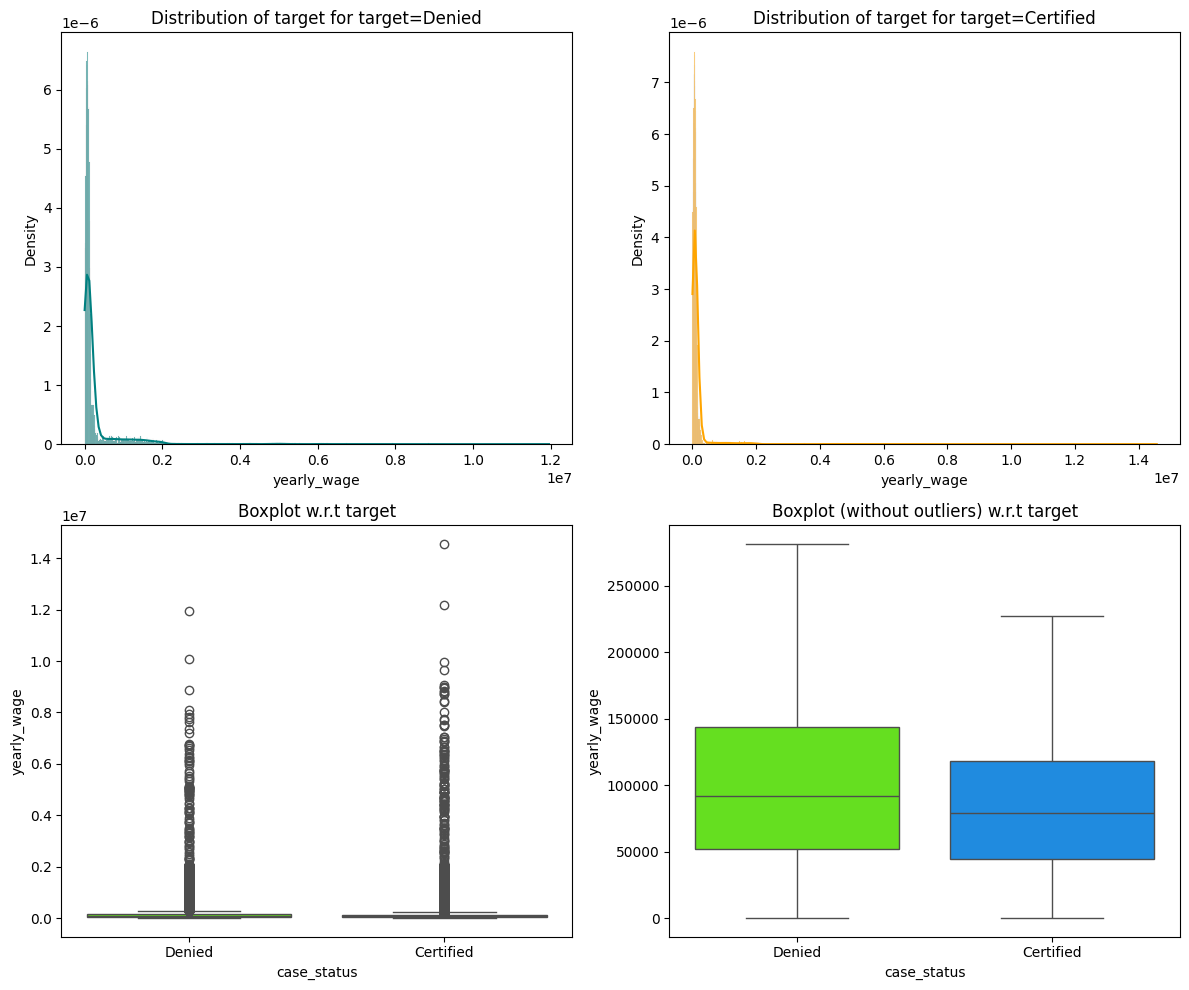

In [123]:
distribution_plot_wrt_target(df, "yearly_wage", "case_status")

#### Observation:
- Median salary for certified applicants is less than denied applicants (**without outliers**)
- Highest salary candidate is Certified

In [124]:
df.groupby(['case_status', 'unit_of_wage']).agg({'prevailing_wage':['count', 'min', 'mean', 'max']})

prevailing_wage                                      
                                   count        min          mean          max
case_status unit_of_wage                                                      
Certified   Hour                     747     2.1367    424.922811     999.1929
            Month                     55  1599.2800  87237.553636  249291.1200
            Week                     169  2183.2300  85974.767160  280175.9500
            Year                   16047   100.0000  80746.407044  318446.0500
Denied      Hour                    1410     2.9561    409.085998     999.9195
            Month                     34  3078.3700  88167.630882  264362.9500
            Week                     103  8352.9900  85003.102233  229950.7000
            Year                    6915   153.1100  82345.844294  319210.2700

#### Observation:
- Number of denials for Hourly wage is more than Certified compared to other unit of wages
- Yealy wages cases get more certified than other categories

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All  Percentage
unit_of_wage                                      
All               17018    8462  25480   66.789639
Year              16047    6915  22962   69.885027
Hour                747    1410   2157   34.631433
Week                169     103    272   62.132353
Month                55      34     89   61.797753
------------------------------------------------------------------------------------------------------------------------


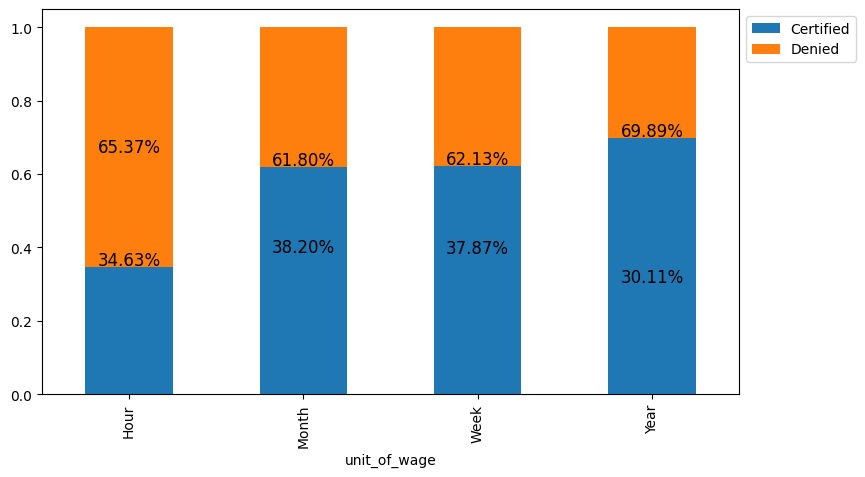

In [125]:
stacked_barplot(df, "unit_of_wage", "case_status")

#### Observation:
- Hourly salary has more denials
- Monthly and weekly has similar pattern for approvals and denials
- Yealy salary approvals are more  - 70%

## Data Pre-processing

### Outlier Check

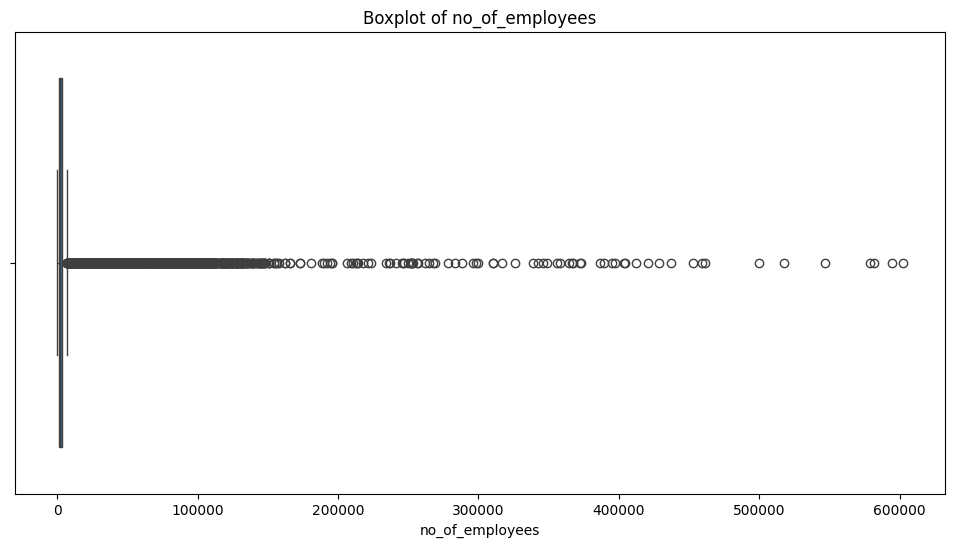

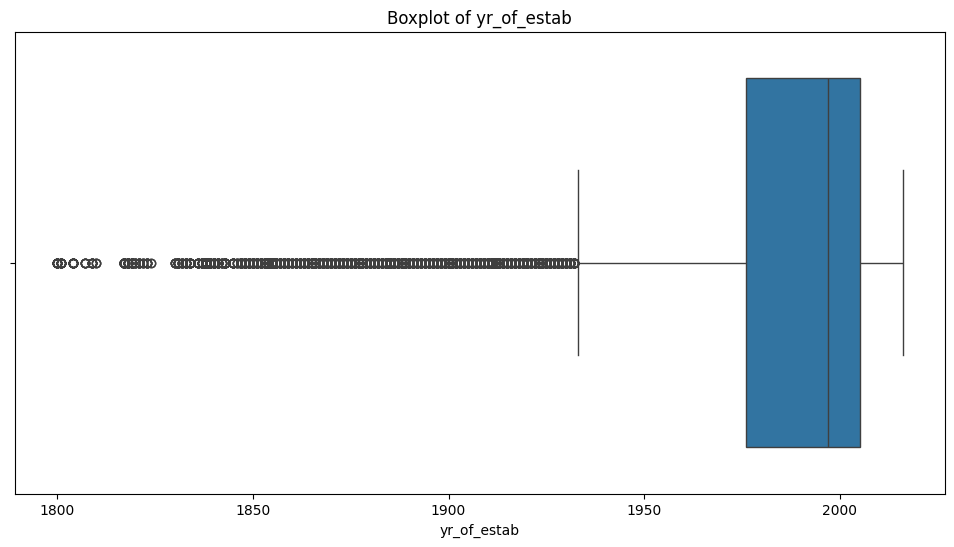

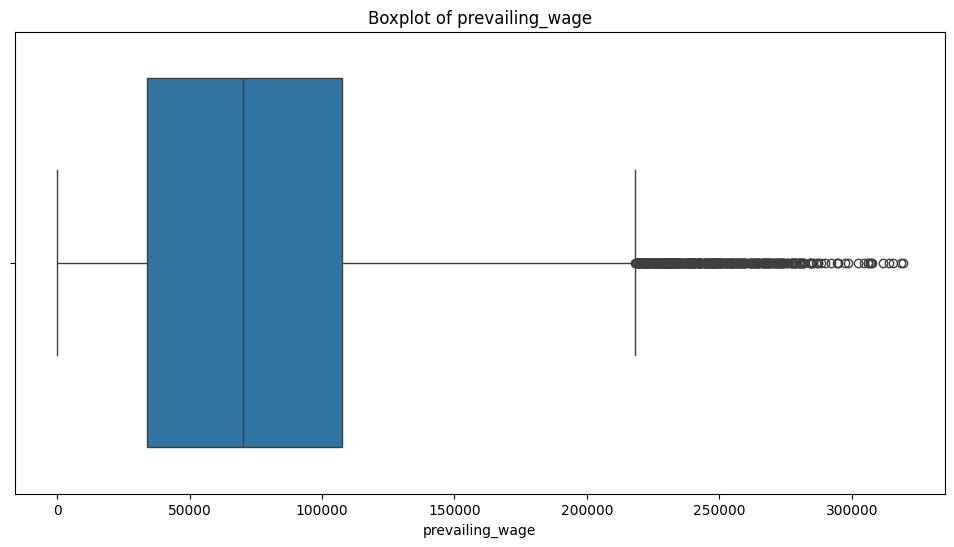

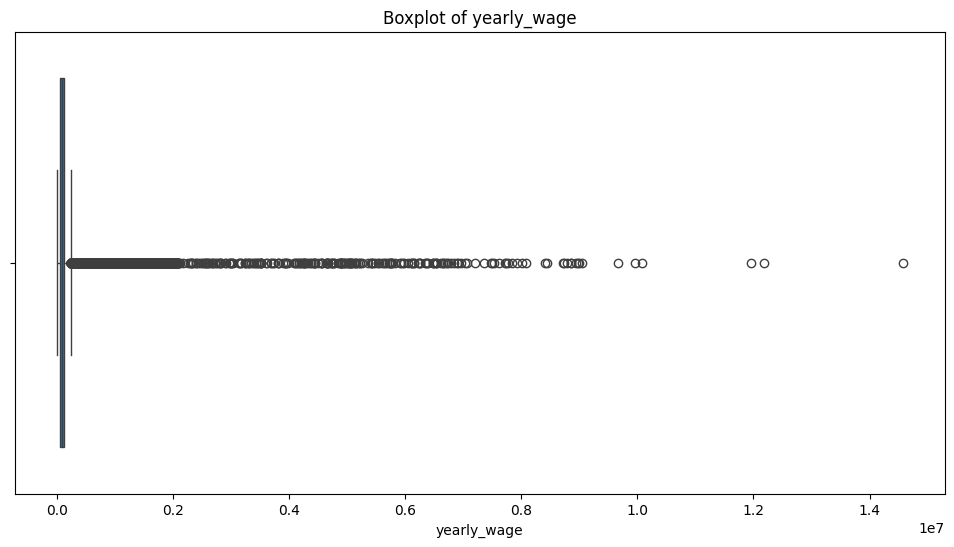

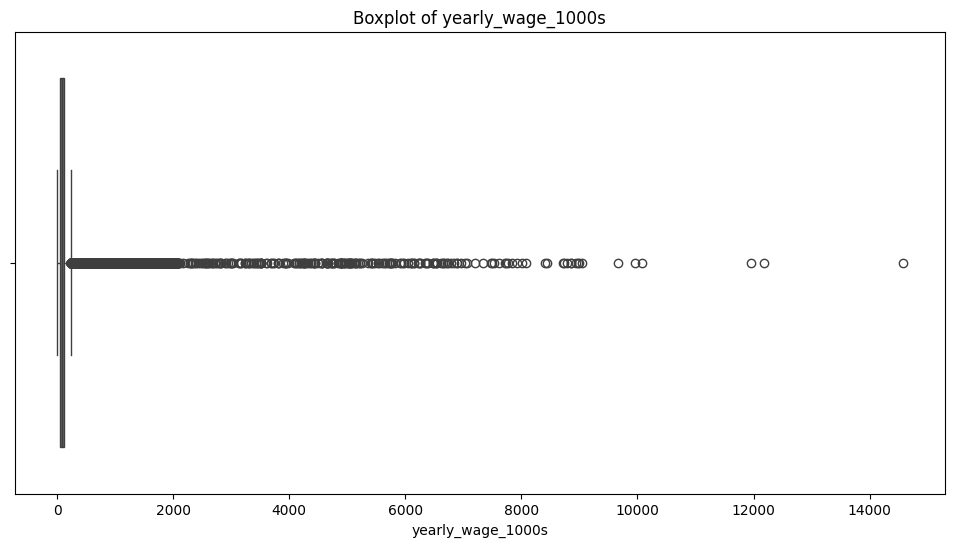

In [126]:
def outlier_check(data):
    for col in data.columns:
        if data[col].dtype != 'object':
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=data[col])
            plt.title(f'Boxplot of {col}')
            plt.show()

outlier_check(df)


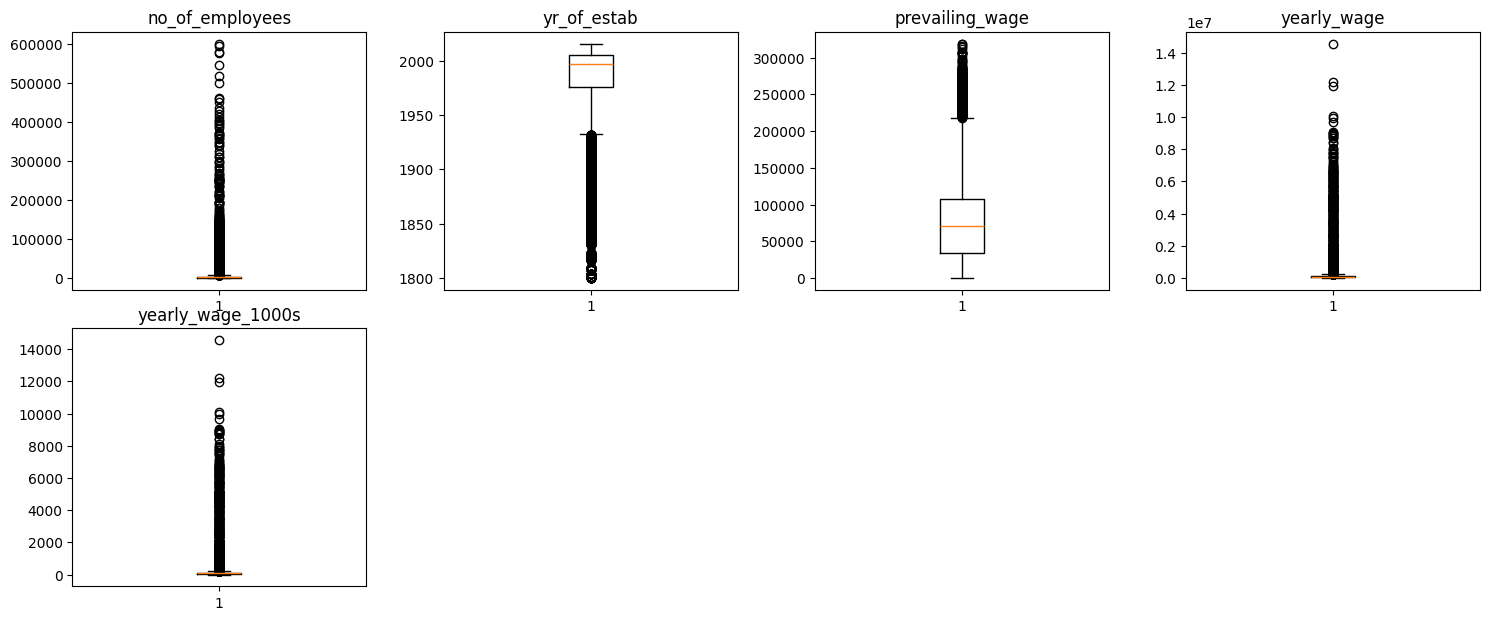

In [127]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation:
- Year of establishment of company has outliers in the lower Whiskers as most of the companies have established before 1930s
- No. of employees has more outliers and there are companies with 600K employees
- Lots of Upper Whiskers in prevailing wage
- Yearly wage and yearly wage in 1000s are data created by developer
  - 14 mil is the highest salary range

### Data Preparation for modeling

In [128]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


#### Observation:
- No records of NULL

In [129]:
df.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


#### Observation:
- No records of NA or NAN

#### Observation:
- Since no null or na values for all columns of records there is no impuration required

In [130]:
data = df.copy()

In [131]:
X = data.drop(['case_id', 'case_status', 'prevailing_wage', 'unit_of_wage', 'yearly_wage_1000s'], axis=1)
y = data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

#### Observation:
- Dropping of target and other columns which are not required for prediction
- Created new column for yearly_wage

In [132]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_test.shape)

(15288, 9) (5096, 9) (5096, 9) (15288,) (5096,)


In [133]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
requires_job_training
N    13477
Y     1811
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
full_time_position
Y    13678
N     1610
Name: count, dtype: int64
******************************


In [134]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
requires_job_training
N    4501
Y     595
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
full_time_position
Y    4552
N     544
Name: count, dtype: int64
******************************


In [47]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
requires_job_training
N    4547
Y     549
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
full_time_position
Y    4543
N     553
Name: count, dtype: int64
******************************


#### Observation:
- Comparing Train Validation and Test set are equally balanced

In [135]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype(float)

X_val = pd.get_dummies(X_val, drop_first=True)
X_val = X_val.astype(float)

X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype(float)

print(X_train.shape, X_val.shape, X_test.shape)

(15288, 18) (5096, 18) (5096, 18)


In [136]:
X_train.head()

,no_of_employees,yr_of_estab,yearly_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_Y
5008,1020.0,2008.0,70919.85,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
12951,1624.0,2003.0,59082.94,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3214,438.0,1991.0,22235.80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
18876,211.0,1911.0,18937.37,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
21939,2696.0,2007.0,65906.82,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Model Building

- For this excercise we have to choose 5 models for predicting Visa for the right candidate



### Model Evaluation Criterion

### Creteria for Model Evaluvation
-  Loss of resource Vs.  Loss of oppurtunity
 - There is concern that Model should be able to pridict the best candidate that will be a value add to USA and not just providing oppurtunity to a least viable candidate who may not be a value add to the USA or to the company recruited
 - With this in picture we are concerned about **RECALL** (*loss of oppurtunity*)  for candidates who are much qualified to get Visa.

In [137]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [138]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning
- As the number of approvals of Visa is 70% and when predicting the data it could push to an imbalanced data
- SMOTE and RandomSampler are considered for imbalanced data
 - Above data preprocessing technique will be combined with K-Fold cross validation
- Recall score will be taken for predicting the model
-  Hyperparameter tuning will wary with every model (and will describe each parameter chossen for the model below)
 - But mostly models will be class weighted

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data
- 5 models chosen for predicting the right candidate for visa
 - Bagging Classifier (base estimator as Decision Tree)
 - Random Forest Classifier (class_weight balanced)
 - Gradient Boosting
 - Ada Boosting
 - Bagging Classifier (base estimator as Logistic Regression)

In [60]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Base Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Base Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("Base GBM", GradientBoostingClassifier(random_state=1 )))
models.append(("Base Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Base BaggingLogistic", BaggingClassifier(estimator=LogisticRegression(solver='liblinear', random_state=1, max_iter=1000, class_weight='balanced'), random_state=1)))


In [61]:
print("\n Base Training Performance and Validation Performance Difference :\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


 Base Training Performance and Validation Performance Difference :

Base Bagging: Training Score: 0.9869, Validation Score: 0.7829, Difference: 0.2040
Base Random forest: Training Score: 1.0000, Validation Score: 0.8367, Difference: 0.1633
Base GBM: Training Score: 0.8745, Validation Score: 0.8675, Difference: 0.0070
Base Adaboost: Training Score: 0.8880, Validation Score: 0.8816, Difference: 0.0063
Base BaggingLogistic: Training Score: 0.9019, Validation Score: 0.8998, Difference: 0.0020


#### Observation:
- From the base model performance of training and validation model set:
  - Gradient Boost ❎
  - Ada Boost ❎
  - Bagging Classifier (Logistic Regresion) ❎
Above 3 models fit the best at the base model prediction

### Model Building with oversampled data

In [139]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 18)
After Oversampling, the shape of train_y: (20420,) 



In [62]:
oversample_models = []  # Empty list to store all the models

# Appending models into the list
oversample_models.append(("OverSample Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
oversample_models.append(("OverSample Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
oversample_models.append(("OverSample GBM", GradientBoostingClassifier(random_state=1 )))
oversample_models.append(("OverSample Adaboost", AdaBoostClassifier(random_state=1)))
oversample_models.append(("OverSample BaggingLogistic", BaggingClassifier(estimator=LogisticRegression(solver='liblinear', random_state=1, max_iter=1000, class_weight='balanced'), random_state=1)))

print("\n Oversampling Training and Validation Performance Difference:\n")

for name, model in oversample_models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


 Oversampling Training and Validation Performance Difference:

OverSample Bagging: Training Score: 0.9838, Validation Score: 0.7665, Difference: 0.2174
OverSample Random forest: Training Score: 1.0000, Validation Score: 0.8220, Difference: 0.1780
OverSample GBM: Training Score: 0.8560, Validation Score: 0.8464, Difference: 0.0097
OverSample Adaboost: Training Score: 0.8497, Validation Score: 0.8399, Difference: 0.0098
OverSample BaggingLogistic: Training Score: 0.9152, Validation Score: 0.9148, Difference: 0.0004


#### Observation:
- From the Over Sampling model performance of training and validation model set:
  - Gradient Boost ❎
  - Ada Boost ❎
  - Bagging Classifier (Logistic Regresion) ❎

Above 3 models fit the best !!!
Even the base model also had the same above models best on predicting the train and validation set

### Model Building with undersampled data

In [140]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [58]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 18)
After Under Sampling, the shape of train_y: (10156,) 



In [66]:
undersample_models = []  # Empty list to store all the models

# Appending models into the list
undersample_models.append(("UnderSample Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
undersample_models.append(("UnderSample Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
undersample_models.append(("UnderSample GBM", GradientBoostingClassifier(random_state=1 )))
undersample_models.append(("UnderSample Adaboost", AdaBoostClassifier(random_state=1)))
undersample_models.append(("UnderSample BaggingLogistic", BaggingClassifier(estimator=LogisticRegression(solver='liblinear', random_state=1, max_iter=1000, class_weight='balanced'), random_state=1)))

print("\n Under Sampling Training and Validation Performance Difference:\n")

for name, model in undersample_models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


 Under Sampling Training and Validation Performance Difference:

UnderSample Bagging: Training Score: 0.9647, Validation Score: 0.6052, Difference: 0.3596
UnderSample Random forest: Training Score: 1.0000, Validation Score: 0.6675, Difference: 0.3325
UnderSample GBM: Training Score: 0.7430, Validation Score: 0.7247, Difference: 0.0183
UnderSample Adaboost: Training Score: 0.6999, Validation Score: 0.7009, Difference: -0.0011
UnderSample BaggingLogistic: Training Score: 0.9273, Validation Score: 0.9269, Difference: 0.0005


#### Observation:
- From the Under Sampling model performance of training and validation model set:
  - Gradient Boost ❎
  - Ada Boost ❎
  - Bagging Classifier (Logistic Regresion) ❎

Above 3 models fit the best !!!
Again and again in Base, Over and Under Sampling of Models proved these three models at it best .

(*curious about bagging classifier for Logistic*)


## Choosing the Models
- Gradient, Ada Boost & Bagging Logistic Regression are models chosen for further fine tunning.

  - After building 15 models out of which 3 models in each category (Base/ Over Sample/ Under Sample) are taken for consideration
  - And after close observation on the models performance value below three models are choosen for Hyperparameter tuning
    - Gradient Boosting
    - Ada Boosting
    - Bagging Classifier (Logistic Regression)

- With above models chosen we will fine tune with Hyperparams and predict the model on Train/Validation and out of the results produced will choose the best model to predict the test data set.

- Using hyperparameters variable,  the models will be fine tuned and then the model will fit on Over Sample Train data as well as Under Sampl Train data and then fit on Validation data set to choose the best model for our company EASY VISA



## Hyperparameter Tuning

## Model Fine Tunning Over/Under Sampling GBM Model

In [68]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=7, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': np.int64(100), 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8724788882938809:
CPU times: user 9.62 s, sys: 1.72 s, total: 11.3 s
Wall time: 13min 31s


#### Observations:
- Following hyperparams are choosen
  - init as  initial estimator used for boosting and it has two estimator for prediction of the model GBM
  - n_estimator - number of boosting stages or trees to predict the best combination
  - learning_rate - controls the contribution of each tree . If the value is 1 faster the learning which would result in overfitting model. Lower the value (0.01) best for learning as it is slow and makes the model the best prediction
  - subsample - Fraction of samples used to train each model. Typical values range as 05, 0.8, 1 (50%, 80%, 100%) of data is used for traning. Typical value should be around .8.
  - max_features - number of columns or features to consider when looking for the best split at each node of a tree. Simply put the number of columns that needs to get split at each node of the tree. Smaller number mean less complex tree and Bigger number mean more complex and time consuming and cost. So usualy SQRT or float value will determine the best params

- Best Params for the model:
  - Best parameters are {'subsample': 1, 'n_estimators': np.int64(100), 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)}
  - with CV score=0.8724788882938809 (87% Recall score)


In [69]:
tuned_gbm_oversamp = GradientBoostingClassifier(
    random_state=1,
    subsample=1,
    n_estimators=100,
    max_features=1,
    learning_rate=0.01,
    init=DecisionTreeClassifier(random_state=1),
)
tuned_gbm_oversamp.fit(X_train_over, y_train_over)

# Checking model's performance on training set
gbm_oversamp_train = model_performance_classification_sklearn(tuned_gbm_oversamp, X_train_over, y_train_over)
gbm_oversamp_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Observation:
- Though the model best parameters are choosen the Recall for this model is 1 which is overfitting and
- ** Require Recalibration of Hyperparameters **

In [70]:
# Checking model's performance on validation set
gbm_oversamp_val = model_performance_classification_sklearn(tuned_gbm_oversamp, X_val, y_val)
gbm_oversamp_val

,Accuracy,Recall,Precision,F1
0,0.659929,0.734724,0.750826,0.742687


#### Observation:
- Recall is at .73 for validation data set
- But anyways the model will be fine tunned again to avoid overfitting

In [72]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,150,25),
    "learning_rate": [ 0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 8],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=7, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': np.int64(125), 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1} with CV score=0.8497579740820925:
CPU times: user 10.2 s, sys: 1.48 s, total: 11.7 s
Wall time: 10min 50s


#### Observation:
- Model is again fine tunned with different hyperparameters
 - n_estimators
 - learning_rate
 - max_depth - Having shallower trees prediction and not going to a deeper more complex tree
 - min_samples_split - number of samples required to get split at the node. Higher the value will prevent overfitting
 - min_samples_leaf - minimum samples required at the leaf node
 - subsamples - explained in the above observation
 - max_features - explained

- Best parameters: est parameters are {'subsample': 0.8, 'n_estimators': np.int64(125), 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}
- with CV score=0.8497579740820925

In [78]:
tuned_gbm_oversamp2 = GradientBoostingClassifier(
    subsample= 0.8, n_estimators= 125, min_samples_split= 10, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 5, learning_rate= 0.1
)
tuned_gbm_oversamp2.fit(X_train_over, y_train_over)

# Checking model's performance on training set
gbm_oversamp_train2 = model_performance_classification_sklearn(tuned_gbm_oversamp2, X_train_over, y_train_over)
gbm_oversamp_train2


,Accuracy,Recall,Precision,F1
0,0.826738,0.870519,0.800432,0.834006


#### Observation:
- Now after fine **OVER** tuning the hyperparams  we get a recall at .87 on the training data set

In [79]:
# Checking model's performance on validation set
gbm_oversamp_val2 = model_performance_classification_sklearn(tuned_gbm_oversamp2, X_val, y_val)
gbm_oversamp_val2

,Accuracy,Recall,Precision,F1
0,0.745487,0.854289,0.784039,0.817658


#### Observation:
- Recall of .85 on validation data set is close to training data set

In [87]:
tuned_gbm_undersamp2 = GradientBoostingClassifier(
    subsample= 0.8, n_estimators= 125, min_samples_split= 10, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 5, learning_rate= 0.1
)
tuned_gbm_undersamp2.fit(X_train_over, y_train_over)

# Checking model's performance on training set
gbm_undersamp_train2 = model_performance_classification_sklearn(tuned_gbm_undersamp2, X_train_un, y_train_un)
gbm_undersamp_train2

,Accuracy,Recall,Precision,F1
0,0.718196,0.87692,0.66562,0.756798


#### Observation:
- Recall for **UNDER** train data set at .87

In [88]:
# Checking model's performance on validation set
gbm_undersamp_val2 = model_performance_classification_sklearn(tuned_gbm_undersamp2, X_val, y_val)
gbm_undersamp_val2

,Accuracy,Recall,Precision,F1
0,0.748038,0.854877,0.786486,0.819257


#### Observation:
- Recall of .85 on validation set compared to UNDER train data set

## Model Fine Tuning on Over/Under Sampled Ada Boost

In [141]:
%%time

#defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 80, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(40), 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9313418217433889:
CPU times: user 3.4 s, sys: 541 ms, total: 3.94 s
Wall time: 4min 7s


#### Observation:
- params explain in the above context
- Best parameters are {'n_estimators': np.int64(40), 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}
- with CV score=0.9313418217433889 (.93 is the greatest CV score as of now)
- CV (cross validation) - its a technique used to assess how well the model generalizes to unseen data .
- CV is 5 in RandomizedSearchCV - we spliting the data into 5 fold and
- n_iter is 50 - number of parameters are sampled


In [144]:
tuned_adb_undersamp1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=40,
    learning_rate=0.01,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb_undersamp1.fit(X_train_un, y_train_un)
# Checking model's performance on training set
adb_undersamp_train1 = model_performance_classification_sklearn(tuned_adb_undersamp1, X_train_un, y_train_un)
adb_undersamp_train1

,Accuracy,Recall,Precision,F1
0,0.597972,0.931272,0.558785,0.698471


#### Observation:
- .93 Recall score a well trained model for **UNDER** sampled  there by predicting most of the opprtunities that candidate will be approved of Visa

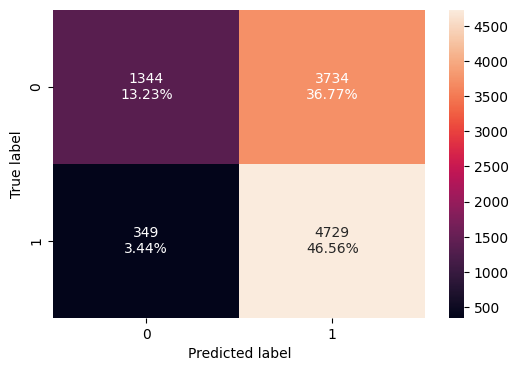

In [165]:
confusion_matrix_sklearn(tuned_adb_undersamp1, X_train_un, y_train_un)

In [120]:
# Checking model's performance on validation set
adb_undersamp_val1 = model_performance_classification_sklearn(tuned_adb_undersamp1, X_val, y_val)
adb_undersamp_val1

,Accuracy,Recall,Precision,F1
0,0.715856,0.933901,0.722172,0.814502


#### Observation:
- .93 on Recall for validation data set

In [145]:
tuned_adb_oversamp1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=40,
    learning_rate=0.01,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb_oversamp1.fit(X_train_over, y_train_over)
# Checking model's performance on training set
adb_oversamp_train1 = model_performance_classification_sklearn(tuned_adb_oversamp1, X_train_over, y_train_over)
adb_oversamp_train1

,Accuracy,Recall,Precision,F1
0,0.646572,0.931342,0.593385,0.724909


#### Observation:
- .93 Recall for **OVER** sampled Training data set

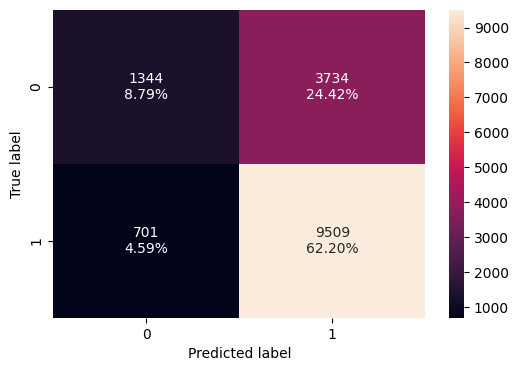

In [166]:
confusion_matrix_sklearn(tuned_adb_undersamp1, X_train, y_train)

In [104]:
# Checking model's performance on validation set
adb_oversamp_val1 = model_performance_classification_sklearn(tuned_adb_oversamp1, X_val, y_val)
adb_oversamp_val1

,Accuracy,Recall,Precision,F1
0,0.715856,0.933901,0.722172,0.814502


#### Observation:
- .93 Recall on validation data set

## Model Fine Tuning on Over/Under Sample Bagging Classifier (Logistic Regressor)

In [84]:
%%time

Model = BaggingClassifier(estimator=LogisticRegression(solver='liblinear', random_state=1, max_iter=1000, class_weight='balanced'), random_state=1)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.8]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.5, 'max_features': 0.8} with CV score=0.7317854233738024:
CPU times: user 1.59 s, sys: 234 ms, total: 1.82 s
Wall time: 1min 1s


#### Observation:
-Best parameters are {'n_estimators': 50, 'max_samples': 0.5, 'max_features': 0.8}
- with CV score=0.7317854233738024:
- Though this model performed well in the base and oversampled and undersampled models with hyperparameter tunning it didnt perform well and may be we can take the base models for analyzing but again a rework !!!


In [95]:
tuned_bagLogReg_under_samp1 = BaggingClassifier(estimator=LogisticRegression(solver='liblinear', random_state=1, max_iter=1000, class_weight='balanced'), random_state=1, n_estimators=50, max_samples=0.5, max_features=0.8)

tuned_bagLogReg_under_samp1.fit(X_train_un, y_train_un)
# Checking model's performance on training set
bagLogReg_undersamp_train1 = model_performance_classification_sklearn(tuned_bagLogReg_under_samp1, X_train_un, y_train_un)
bagLogReg_undersamp_train1

,Accuracy,Recall,Precision,F1
0,0.692005,0.715045,0.683547,0.698941


In [96]:
# Checking model's performance on validation set
bagLogReg_undersamp_val1 = model_performance_classification_sklearn(tuned_bagLogReg_under_samp1, X_val, y_val)
bagLogReg_undersamp_val1

,Accuracy,Recall,Precision,F1
0,0.702512,0.709753,0.820652,0.761185


In [111]:
tuned_bagLogReg_over_samp1 = BaggingClassifier(estimator=LogisticRegression(solver='liblinear', random_state=1, max_iter=1000, class_weight='balanced'), random_state=1, n_estimators=50, max_samples=0.5, max_features=0.8)

tuned_bagLogReg_over_samp1.fit(X_train_over, y_train_over)
# Checking model's performance on training set
bagLogReg_oversamp_train1 = model_performance_classification_sklearn(tuned_bagLogReg_over_samp1, X_train_over, y_train_over)
bagLogReg_oversamp_train1

,Accuracy,Recall,Precision,F1
0,0.705044,0.726934,0.696444,0.711362


In [112]:
# Checking model's performance on validation set
bagLogReg_oversamp_val1 = model_performance_classification_sklearn(tuned_bagLogReg_over_samp1, X_val, y_val)
bagLogReg_oversamp_val1

,Accuracy,Recall,Precision,F1
0,0.704082,0.717685,0.817057,0.764154


#### Observation:
- Overall the recall (.70- .73) is not good as Ada Boosting


In [107]:
%%time

Model = BaggingClassifier(estimator=LogisticRegression(solver='liblinear', random_state=1, max_iter=1000, class_weight='balanced'), random_state=1)
param_grid = {
    'n_estimators': [10, 50, 100, 200],           # Include higher values
    'max_samples': [0.5, 0.7, 0.9, 1.0],          # Include 1.0 to avoid data restriction
    'max_features': [0.5, 0.7, 0.9, 1.0],         # Include 1.0 for full feature set
    'estimator__C': [0.01, 0.1, 1.0, 10.0],  # Vary regularization
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'max_samples': 0.9, 'max_features': 1.0, 'estimator__C': 10.0} with CV score=0.9231975097940344:
CPU times: user 3.65 s, sys: 741 ms, total: 4.39 s
Wall time: 5min


#### Observations:
- Best parameters are {'n_estimators': 10, 'max_samples': 0.9, 'max_features': 1.0, 'estimator__C': 10.0}
- with CV score=0.9231975097940344
- CV score of .92 is par with Ada Boost model
- Above fine tuning proved to improve CV Score compared prior fine tuning .
- For Logic Regression we have the estimator__C a C value to fine tune the model . Large C value is weaker regularization and smaller C value is stronger regularization
  - Large C value makes the regularization weaker
  - even though the CV score is .93 but considering C value as 10.0
  - we might have to **negate and avoid this Model**


In [114]:
tuned_bagLogReg_over_samp2 = BaggingClassifier(
    estimator=LogisticRegression(solver='liblinear', random_state=1, max_iter=1000, class_weight='balanced', C=10.0),
    random_state=1, n_estimators=10, max_samples=0.9, max_features=1.0)

tuned_bagLogReg_over_samp2.fit(X_train_over, y_train_over)
# Checking model's performance on training set
bagLogReg_oversamp_train1 = model_performance_classification_sklearn(tuned_bagLogReg_over_samp2, X_train_over, y_train_over)
bagLogReg_oversamp_train1

,Accuracy,Recall,Precision,F1
0,0.553869,0.915867,0.531246,0.672444


In [115]:
# Checking model's performance on validation set
bagLogReg_oversamp_val1 = model_performance_classification_sklearn(tuned_bagLogReg_over_samp2, X_val, y_val)
bagLogReg_oversamp_val1

,Accuracy,Recall,Precision,F1
0,0.673666,0.9151,0.693918,0.789307


In [117]:
tuned_bagLogReg_under_samp2 = BaggingClassifier(
    estimator=LogisticRegression(solver='liblinear', random_state=1, max_iter=1000, class_weight='balanced'),
    random_state=1, n_estimators=10, max_samples=0.9, max_features=1.0)

tuned_bagLogReg_under_samp2.fit(X_train_un, y_train_un)
# Checking model's performance on training set
bagLogReg_undersamp_train1 = model_performance_classification_sklearn(tuned_bagLogReg_under_samp2, X_train_un, y_train_un)
bagLogReg_undersamp_train1

,Accuracy,Recall,Precision,F1
0,0.553367,0.922607,0.530698,0.67381


In [118]:
# Checking model's performance on validation set
bagLogReg_undersamp_val1 = model_performance_classification_sklearn(tuned_bagLogReg_under_samp2, X_val, y_val)
bagLogReg_undersamp_val1

,Accuracy,Recall,Precision,F1
0,0.676609,0.920682,0.694592,0.791814


#### Observation:
- Overall the Recall is at .90 - .92
 - Not only with fine tunned params even the base model and Over/under sample model also produce similar results and all range from .89 to .92
- But as discussed the model as higher value of C = 10.0  as well as this model is slightly less on Recall compared Ada Boost which has Recall of .93 will be choosen the best model for this project

## Model Performances

In [131]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
      gbm_oversamp_train2,
      gbm_oversamp_val2,

      gbm_undersamp_train2,
      gbm_undersamp_val2,

      adb_oversamp_train1,
      adb_oversamp_val1,

      adb_undersamp_train1,
      adb_undersamp_val1,

      bagLogReg_oversamp_train1,
      bagLogReg_oversamp_val1,

      bagLogReg_undersamp_train1,
      bagLogReg_undersamp_val1,

    ],
    axis=0,
)
models_train_comp_df.index  = [
    "GBM trained with Over Sampled data",
    "GBM trained with Over Sampled Validation data",
    "GBM trained with Under Sampled data",
    "GBM trained with Under Sampled Validation data",
    "AdaBoost trained with Over Sampled data",
    "AdaBoost trained with Over Sampled Validation data",
    "AdaBoost trained with Under Sampled data",
    "AdaBoost trained with Under Sampled Validation data",
    "BaggingLogistic trained with Over Sampled data",
    "BaggingLogistic trained with Over Sampled Validation data",
    "BaggingLogistic trained with Under Sampled data",
    "BaggingLogistic trained with Under Sampled Validationdata",
]
print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Accuracy,Recall,Precision,F1
GBM trained with Over Sampled data,0.826738,0.870519,0.800432,0.834006
GBM trained with Over Sampled Validation data,0.745487,0.854289,0.784039,0.817658
GBM trained with Under Sampled data,0.718196,0.876920,0.665620,0.756798
GBM trained with Under Sampled Validation data,0.748038,0.854877,0.786486,0.819257
AdaBoost trained with Over Sampled data,0.646572,0.931342,0.593385,0.724909
AdaBoost trained with Over Sampled Validation data,0.715856,0.933901,0.722172,0.814502
AdaBoost trained with Under Sampled data,0.597972,0.931272,0.558785,0.698471
AdaBoost trained with Under Sampled Validation data,0.715856,0.933901,0.722172,0.814502
BaggingLogistic trained with Over Sampled data,0.553869,0.915867,0.531246,0.672444
BaggingLogistic trained with Over Sampled Validation data,0.673666,0.915100,0.693918,0.789307


#### Observation:
- Recall Value observation
  - Considering all model performance score values

*** ADA BOOSTING *** is chosen the best model

In [126]:
# training performance comparison

# Create a list to store DataFrames for each model's performance
model_dfs = []

# Append DataFrames for each model with appropriate index
model_dfs.append(gbm_oversamp_train2.rename(index={0: "GBM trained with Over Sampled data (Train)"}))
model_dfs.append(gbm_oversamp_val2.rename(index={0: "GBM trained with Over Sampled data (Validation)"}))

model_dfs.append(gbm_undersamp_train2.rename(index={0: "GBM trained with Under Sampled data (Train)"}))
model_dfs.append(gbm_undersamp_val2.rename(index={0: "GBM trained with Under Sampled data (Validation)"}))

model_dfs.append(adb_oversamp_train1.rename(index={0: "AdaBoost trained with Over Sampled data (Train)"}))
model_dfs.append(adb_oversamp_val1.rename(index={0: "AdaBoost trained with Over Sampled data (Validation)"}))

model_dfs.append(adb_undersamp_train1.rename(index={0: "AdaBoost trained with Under Sampled data (Train)"}))
model_dfs.append(adb_undersamp_val1.rename(index={0: "AdaBoost trained with Under Sampled data (Validation)"}))

model_dfs.append(bagLogReg_oversamp_train1.rename(index={0: "BaggingLogistic trained with Over Sampled data (Train)"}))
model_dfs.append(bagLogReg_oversamp_val1.rename(index={0: "BaggingLogistic trained with Over Sampled data (Validation)"}))

model_dfs.append(bagLogReg_undersamp_train1.rename(index={0: "BaggingLogistic trained with Under Sampled data (Train)"}))
model_dfs.append(bagLogReg_undersamp_val1.rename(index={0: "BaggingLogistic trained with Under Sampled data (Validation)"}))

# Concatenate the DataFrames vertically
models_train_comp_df = pd.concat(model_dfs, axis=0)

print("Training performance comparison:")
print(models_train_comp_df)

Training performance comparison:
                                                    Accuracy    Recall  \
GBM trained with Over Sampled data (Train)          0.826738  0.870519   
GBM trained with Over Sampled data (Validation)     0.745487  0.854289   
GBM trained with Under Sampled data (Train)         0.718196  0.876920   
GBM trained with Under Sampled data (Validation)    0.748038  0.854877   
AdaBoost trained with Over Sampled data (Train)     0.646572  0.931342   
AdaBoost trained with Over Sampled data (Valida...  0.715856  0.933901   
AdaBoost trained with Under Sampled data (Train)    0.597972  0.931272   
AdaBoost trained with Under Sampled data (Valid...  0.715856  0.933901   
BaggingLogistic trained with Over Sampled data ...  0.553869  0.915867   
BaggingLogistic trained with Over Sampled data ...  0.673666  0.915100   
BaggingLogistic trained with Under Sampled data...  0.553367  0.922607   
BaggingLogistic trained with Under Sampled data...  0.676609  0.920682   

    

In [134]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb_oversamp1, X_test, y_test)
ada_test.index = ["AdaBoost Test Over Sampled Data"]
ada_test

,Accuracy,Recall,Precision,F1
AdaBoost Test Over Sampled Data,0.708203,0.930082,0.717101,0.809822


#### Observation:
- Ada Boosting Test Data Set Recall is at .93 par with Training and Validation Data Set

## Feature Importanacece

Index(['no_of_employees', 'yr_of_estab', 'yearly_wage', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America', 'education_of_employee_Doctorate',
       'education_of_employee_High School', 'education_of_employee_Master's',
       'has_job_experience_Y', 'requires_job_training_Y',
       'region_of_employment_Midwest', 'region_of_employment_Northeast',
       'region_of_employment_South', 'region_of_employment_West',
       'full_time_position_Y'],
      dtype='object')


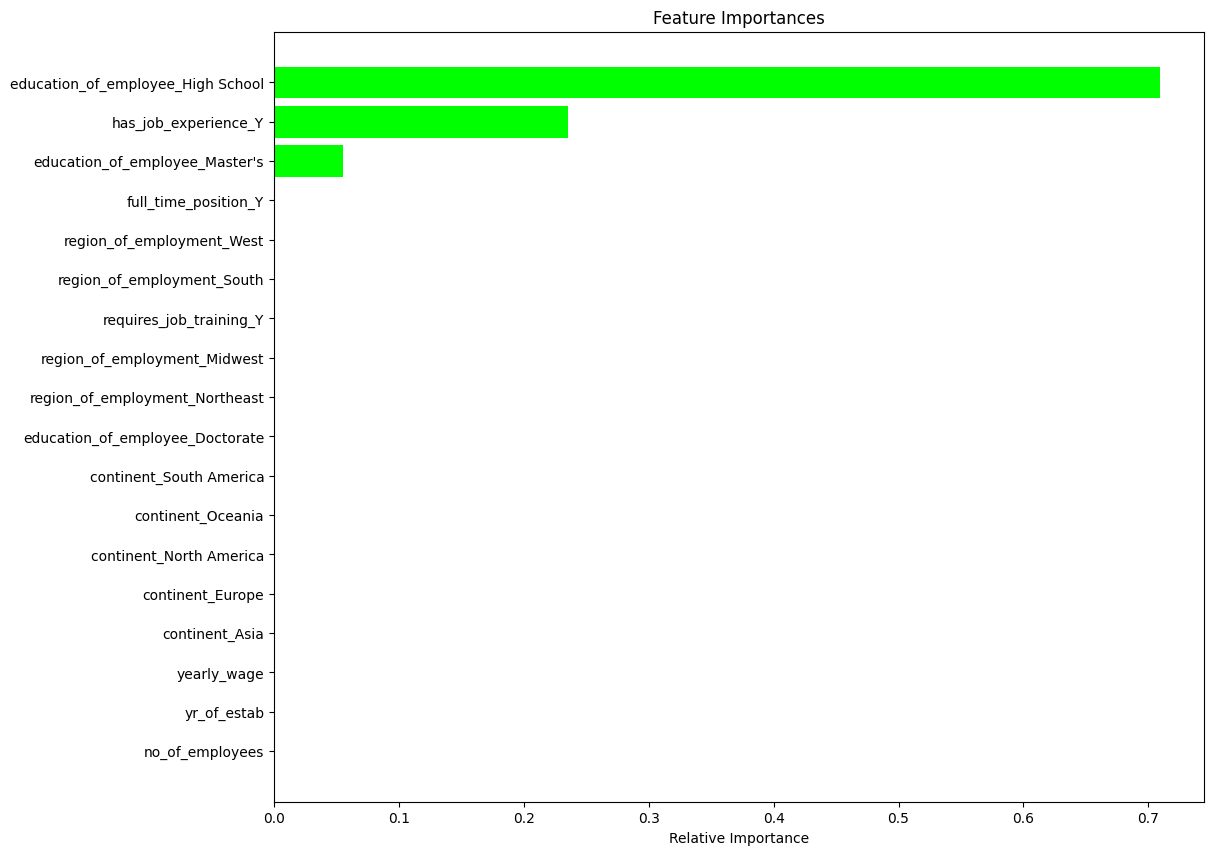

In [163]:
feature_names = X_train.columns
importances = tuned_adb_oversamp1.feature_importances_
indices = np.argsort(importances)
print(feature_names)
plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lime", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


#### Observation:
- Feature performance
  - education_of_employee_High School - High schooler has highest denial rate for visa approvals and could be deciding factor for Visa Certified
  - The next big factor in determining the approval rate of Visa is has_job_experience column data and most of the candidates did have job experience
  - Next feature is applicants with Master's




## Actionable Insights and Recommendations

### How to get a better chance of Visa Certified
- Most educated is a easy approval of Visa
 - Doctorate applicants has the better chance of Visa Certified
 - High school grads are least to get Visa approved
- Applicants from Europe get easy approval of Visa Certified
 - South America has the least approval of Visa Certified
- More the job experience better the chance of Visa Certified
 - 74% Visa Certified for applicants with job experience
- Though we had salaries in the outliers (above and beyond avg. salary) still did not get visa approved
 - Highest salary record for the data set is at 14 million
 - Salary did not play a major role is getting Visa certified
- If applying for Visa to work in the region of Midwest has the higer chance to get approved (75%)
 - Least is Island of 60% very close is West and N.East 62% each
- Higher chances of getting Visa Certified if the salary is yealy compared hourly, monthly and weekly
 - So negociate salary in yearly basis

<font size=6 color='blue'>Power Ahead</font>
___